# The Sparks Foundation - Data Science & Business Analytics Internship
## Author - Mayur Pokharkar
## Task-1 : " Prediction using Unsupervised Learning "
### Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Reading the dataset

In [4]:
# pd.set_option('display.max_rows',None)
data = pd.read_csv("Iris.csv")
print(data.head(n=10))
# data

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [43]:
print(max(data['SepalLengthCm']))
print(max(data['SepalWidthCm']))
print(max(data['PetalLengthCm']))
print(max(data['PetalWidthCm']))

7.9
4.4
6.9
2.5


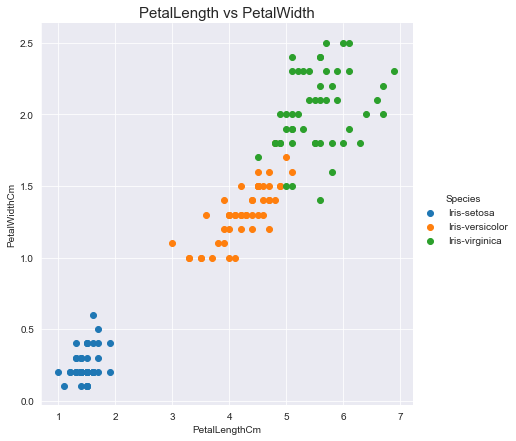

In [61]:
sns.set_style("darkgrid")
# petal_length vs petal_width
# height used to define height of graph whereas hue store the class of iris dataset.
sns.FacetGrid(data, hue="Species", height=6).map(
    plt.scatter, 'PetalLengthCm', 'PetalWidthCm').add_legend()
plt.title('PetalLength vs PetalWidth', fontsize = 15)
plt.show()

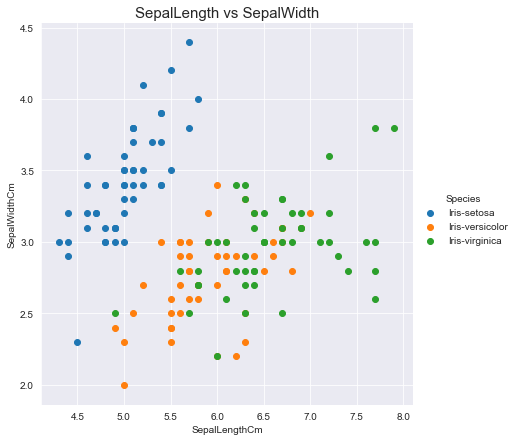

In [62]:
sns.set_style("darkgrid")
# sepal_length vs sepal_width
# height used to define height of graph whereas hue store the class of iris dataset.
sns.FacetGrid(data, hue="Species", height=6).map(
    plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()
plt.title('SepalLength vs SepalWidth', fontsize = 15)
plt.show()

In [8]:
x = data.iloc[:, [1, 2, 3, 4]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Now we need the find optimal 'k' for k-means clustering.

In [9]:
# this list will hold the values of WCSS(Within-Clusters-Sum-of-Squares)
arr = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    arr.append(kmeans.inertia_)

In [10]:
arr

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972,
 25.95549708624709]

### Visualizing 'The Elbow Method'

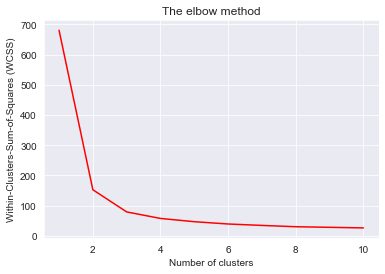

In [17]:
plt.plot(range(1, 11), arr, color = "red")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Clusters-Sum-of-Squares (WCSS)')
plt.show()

#### We can clearly observe that plot here look like an arm with a clear elbow as k = 3. So we will take k as 3 for this dataset.

In [39]:
from kneed import DataGenerator, KneeLocator
k = KneeLocator(range(1,11),arr, curve="convex", direction="decreasing")
print("Value of k is :",k.elbow)

Value of k is : 3


### Training the model

In [12]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=3, init='k-means++',
                max_iter=300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [14]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


### Visualizing the clusters

### For columns 1 and 2

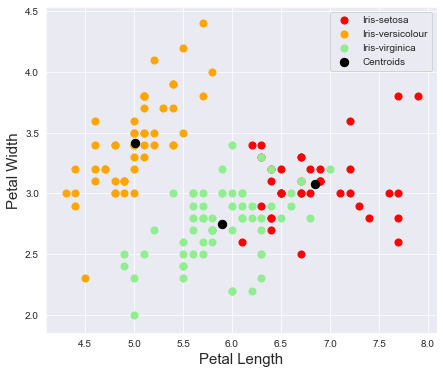

In [52]:
plt.figure(figsize=(7, 6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s=50, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s=50, c='orange', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s=50, c='lightgreen', label='Iris-virginica')

# centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=70, c='black', label='Centroids')
plt.xlabel('Petal Length',fontsize = 15)
plt.ylabel('Petal Width',fontsize = 15)
plt.legend(loc="upper right", fontsize='medium')

### For columns 3 and 4

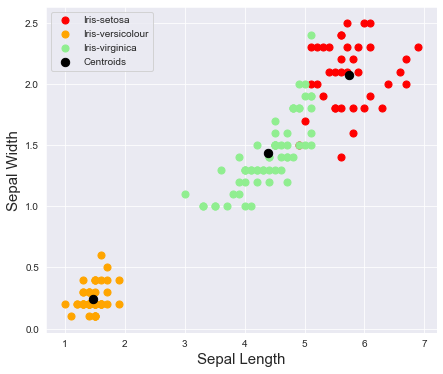

In [53]:
plt.figure(figsize=(7, 6))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3],
            s=50, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3],
            s=50, c='orange', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s=50, c='lightgreen', label='Iris-virginica')

# centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
            s=70, c='black', label='Centroids')
plt.xlabel('Sepal Length',fontsize = 15)
plt.ylabel('Sepal Width',fontsize = 15)
plt.legend(loc="upper left", fontsize='medium')

## Here, In this graphs the black dots are centroids of the clusters